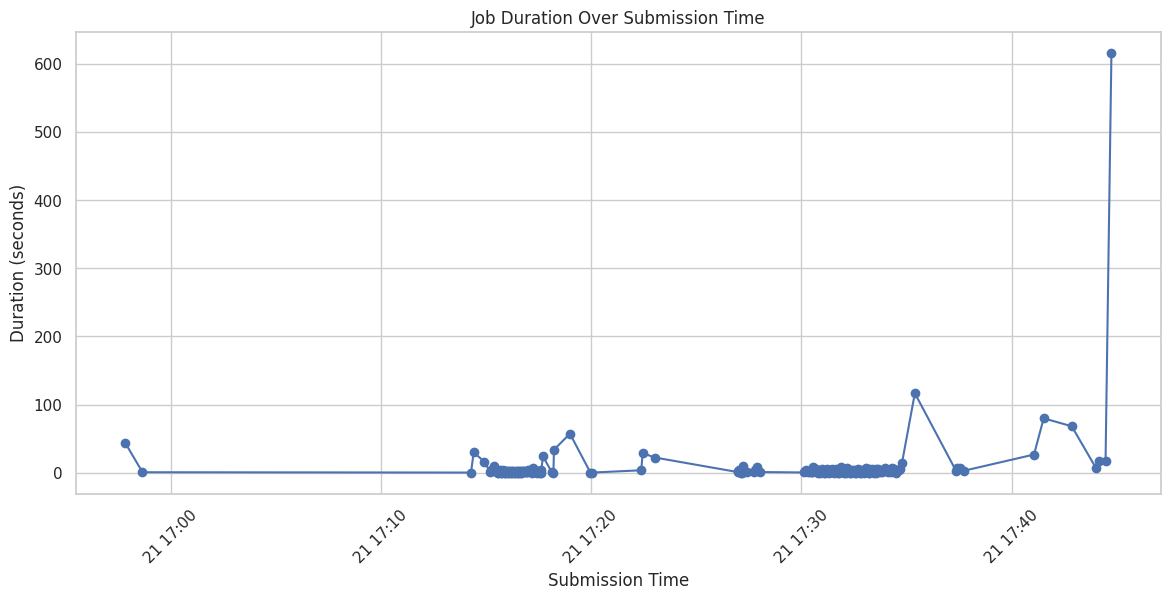

/home/arthur/dev/streaming-pipeline/notebooks/charts.py:1187: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_stages["DurationSec"], shade=True, color="purple")


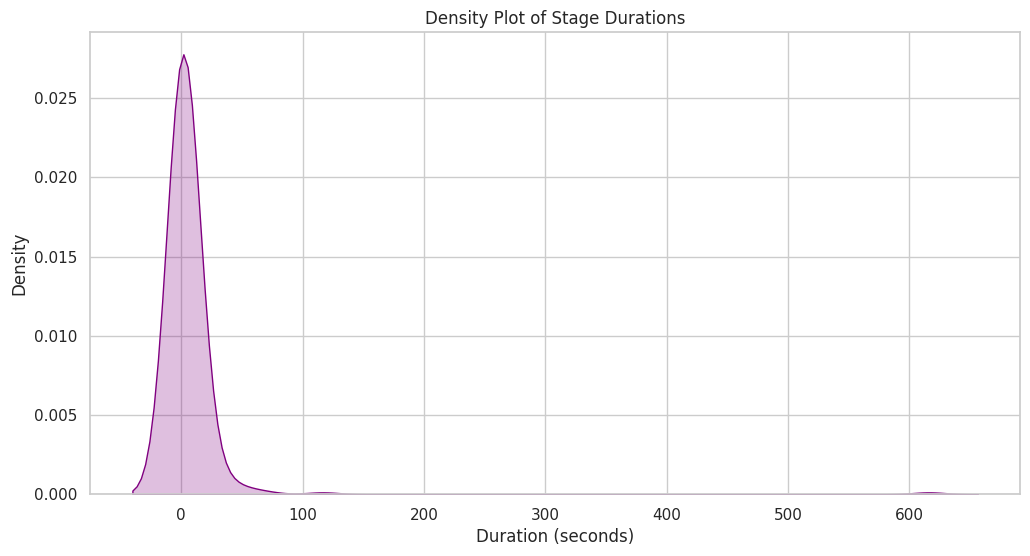

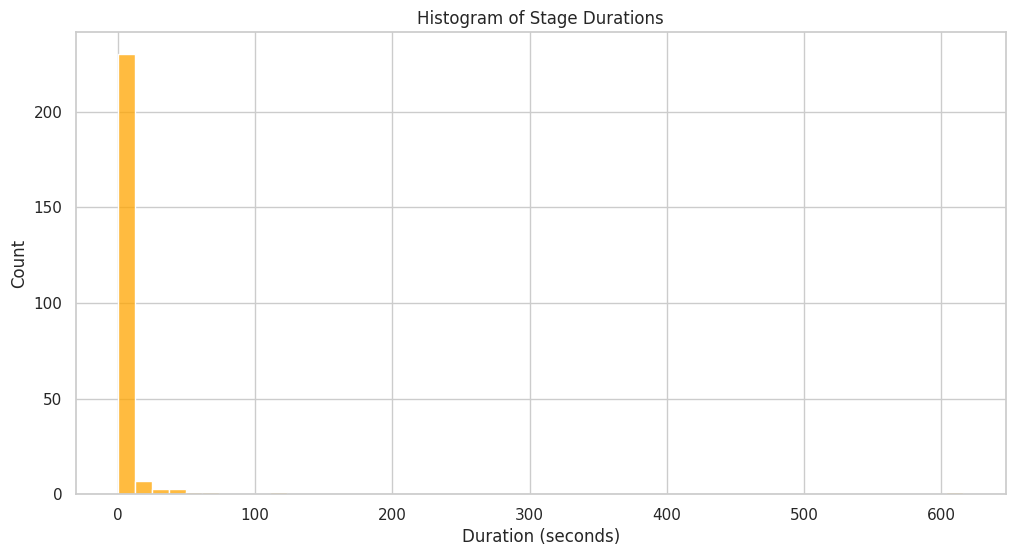

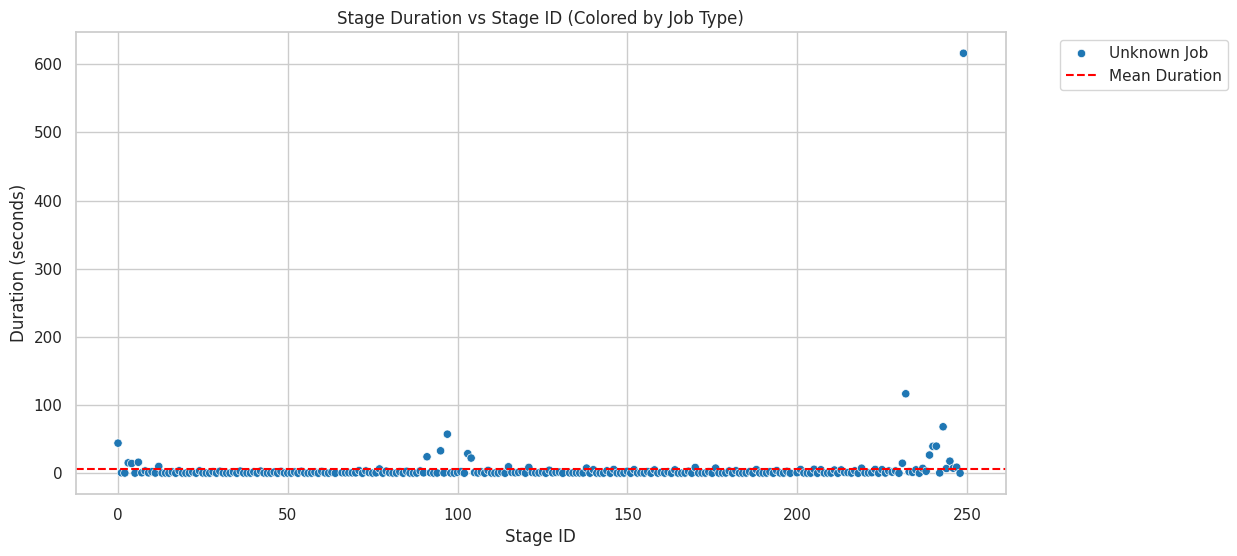

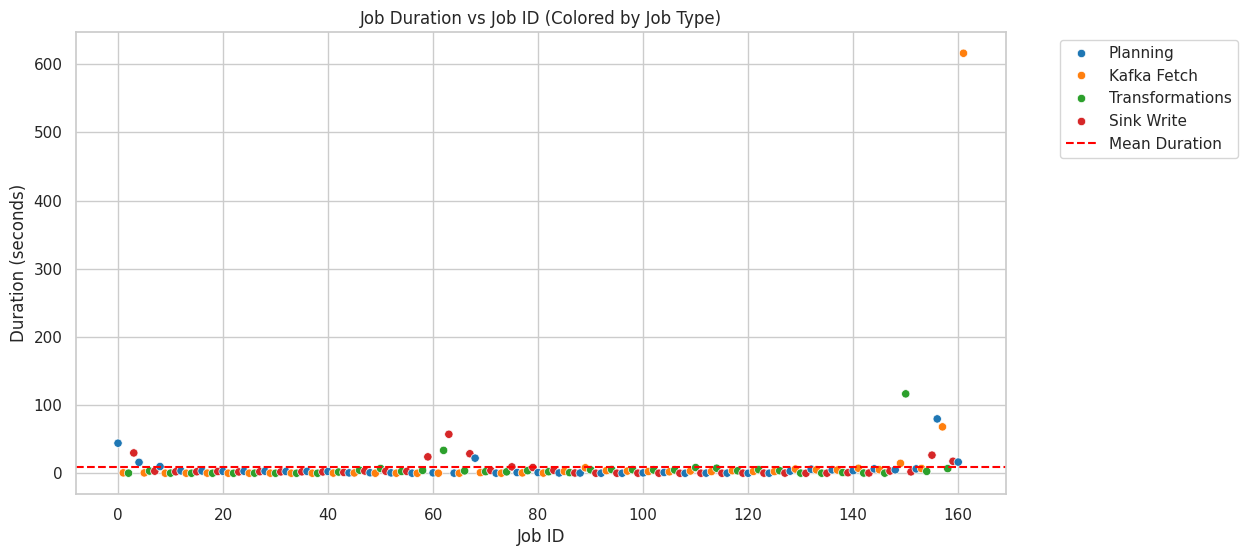

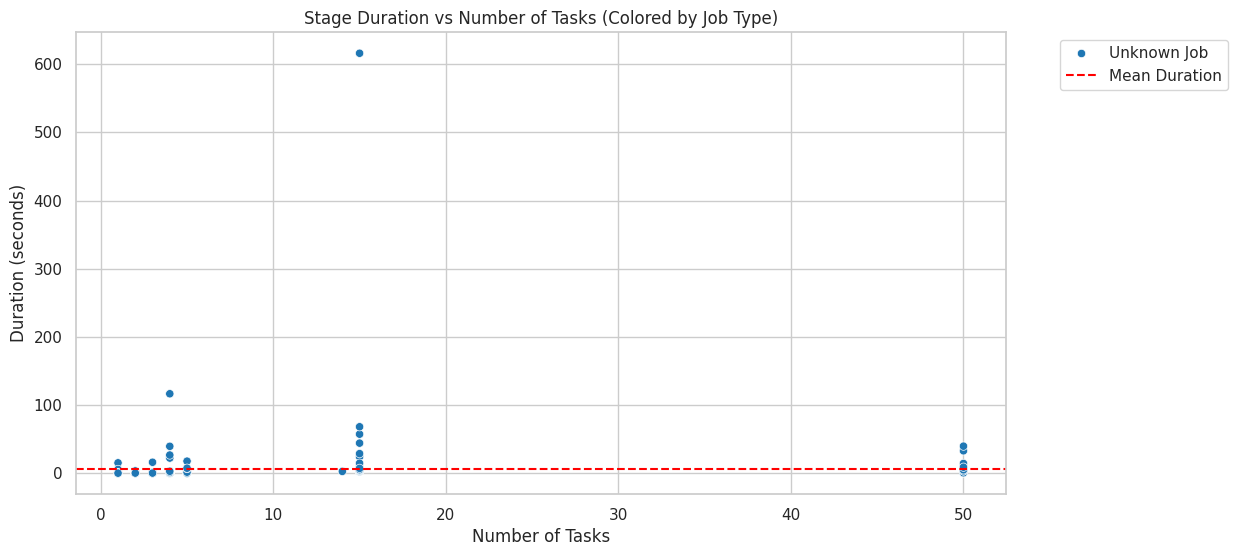

In [1]:
import pandas as pd
import sys
from pathlib import Path

# Add the notebooks directory to the path
sys.path.append(str(Path.cwd().parent))

from charts import plot_spark_eventlog_charts

df_jobs = pd.read_parquet("../../data/raw/first_experiment/df_jobs.parquet")
df_stages = pd.read_parquet("../../data/raw/first_experiment/df_stages.parquet")

plot_spark_eventlog_charts(df_jobs, df_stages)
